In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
features, Labels = make_circles(n_samples=1000,random_state=42,noise=0.03)

In [3]:
data = pd.DataFrame({'X0':features[:,0],'X1':features[:,1], 'labels':Labels})
data.head(6)

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


In [4]:
features[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
Labels[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

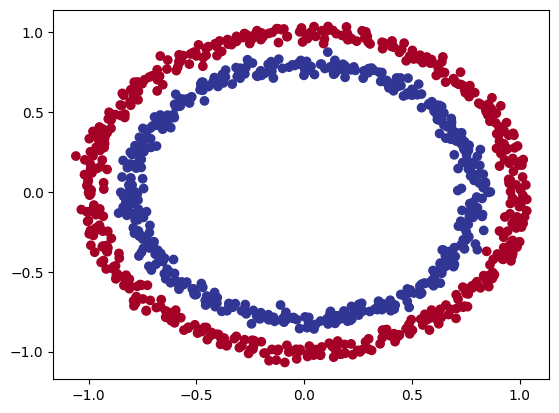

In [6]:
plt.scatter(features[:, 0],features[:, 1], c=Labels, cmap=plt.cm.RdYlBu)

In [7]:
features[0].shape,Labels[1].shape

((2,), ())

In [8]:
import tensorflow as tf

In [9]:
# len(features), len(Labels)
print(features.shape)

(1000, 2)


In [10]:
features.shape[1]

2

**Steps in building a neural network classification**
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak 
* Repeat the process until the desired accuracy is achieved.

In [11]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model.fit(features, Labels, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - l

In [12]:

model.evaluate(features, Labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
def plot_deci_boundary(model, features, Labels):
    # define the boundary axes
    x_min, x_max = features[:,0].min()-0.1, features[:,0].max()+0.1
    y_min, y_max = features[:,1].min() -0.1, features[:,1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # creaye x values to make prediction on
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make_prediction
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Doing binary classifiction')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(features[:,0], features[:,1], c=Labels,s =40,  cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


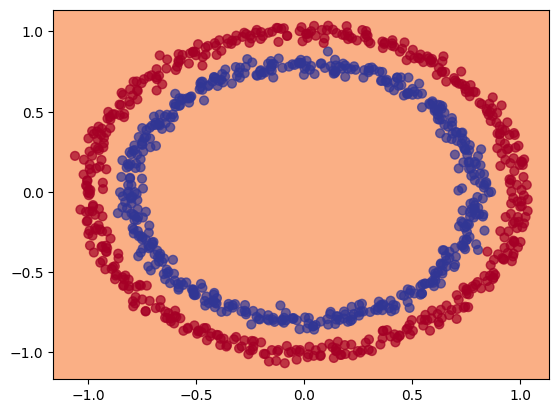

In [14]:
plot_deci_boundary(model, features, Labels)

In [15]:
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(4, activation='relu'))
model1.add(tf.keras.layers.Dense(4,  activation='relu'))
# model1.add(tf.keras.layers.Dense(5, activation='relu'))
model1.add(tf.keras.layers.Dense(1))

# Compile the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model1.fit(features, Labels, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


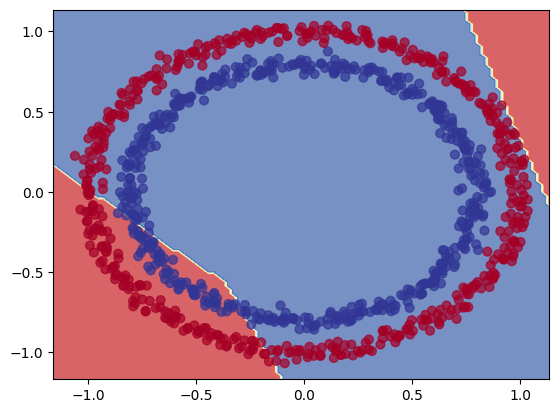

In [16]:
plot_deci_boundary(model1,features,Labels)

In [17]:
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(4, activation='relu'))
model2.add(tf.keras.layers.Dense(4,  activation='relu'))
# model1.add(tf.keras.layers.Dense(5, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

history = model2.fit(features, Labels, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5253 - loss: 0.7077
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6999 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4821 - loss: 0.6921
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6879 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 0.6827 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.6772
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5494 - loss: 0.6709
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5604 - loss: 0.6637
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5910 - loss: 0.6523 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6440 - loss: 0.6305 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.6104 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.721

In [18]:
# model2.evaluate(y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


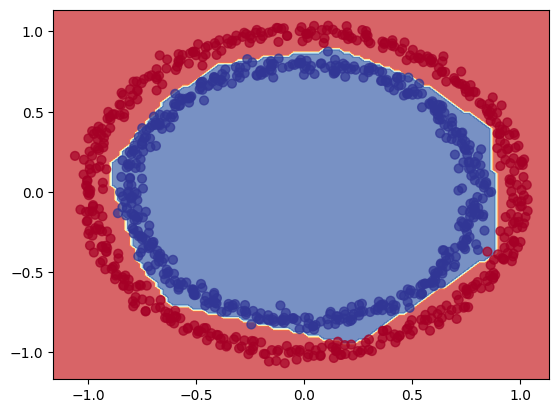

In [19]:
plot_deci_boundary(model2,features,Labels)

In [20]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.493,0.704977
1,0.500,0.694508
2,0.513,0.688802
3,0.531,0.683950
4,0.540,0.678833
5,0.554,0.673301
6,0.557,0.667525
7,0.572,0.660671
8,0.601,0.649245
9,0.637,0.629759


<Axes: >

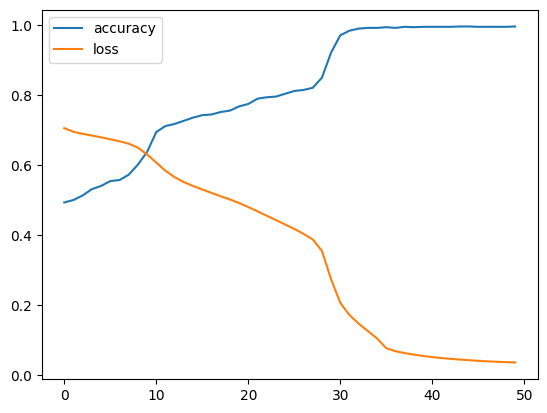

In [21]:
pd.DataFrame(history.history).plot()

**Finding the best model learning rate**
* Making  use of the ***learning rate callback function***
* **note:** The ideal learning learning rate is the point where the learning rate start to decrease fast

In [22]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(4,activation='relu'))
model3.add(tf.keras.layers.Dense(4, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/10))
history3 = model3.fit(features, Labels, epochs=50, callbacks=[learning_rate_scheduler])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5195 - loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5410 - loss: 0.6891 - learning_rate: 1.2589e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 0.6891 - learning_rate: 1.5849e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5248 - loss: 0.6890 - learning_rate: 1.9953e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5143 - loss: 0.6889 - learning_rate: 2.5119e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5186 - loss: 0.6887 - learning_rate: 3.1623e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 0.6886 - learning_rate: 3.9811e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5207 - loss: 0.6884 - learning_rate: 5.0119e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.6881 - learning_rate: 6.3

<Axes: xlabel='epoch'>

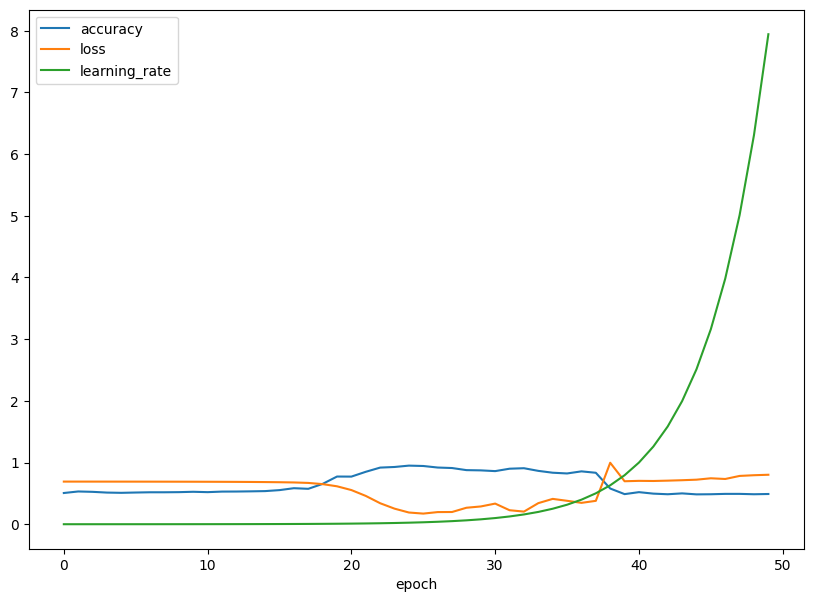

In [23]:
pd.DataFrame(history3.history).plot(figsize=(10,7), xlabel = 'epoch')

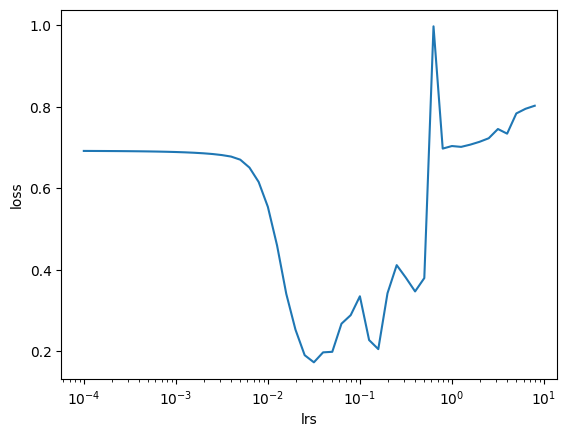

In [24]:
lrs = 1e-4*(10**(tf.range(50)/10))
plt.semilogx(lrs, history3.history['loss'])
plt.xlabel('lrs')
plt.ylabel('loss')
plt.show()

In [44]:
x_train = features[:800]
y_train = Labels[:800]
x_test = features[800:]
y_test = Labels[800:]

In [45]:
# print(len(x_train),len(y_train))
# print(len(x_test),len(y_test))
# x_train.shape
y_train.shape

(800,)

**Building a Model on the splicted dataset**

In [48]:
# defining the model
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(4, activation='relu'))
model4.add(tf.keras.layers.Dense(4, activation='relu'))
model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# coimpiling the model
model4.compile(
    loss = ['binary_crossentropy'],
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

history4 = model4.fit(x_train,y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4804 - loss: 0.7016
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 0.6959 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 0.6900  
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.6890 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5132 - loss: 0.6880
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 0.6860
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 0.6848 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 0.6831 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5097 - loss: 0.6813 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5087 - loss: 0.6779 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 0.6695 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [49]:
model4.evaluate(x_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.2136


[0.2249443084001541, 0.9087499976158142]

In [50]:
model4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - loss: 0.2456  


[0.22257332503795624, 0.9150000214576721]

**Creating a subplot to visualize the trainin and testing data**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classifiction


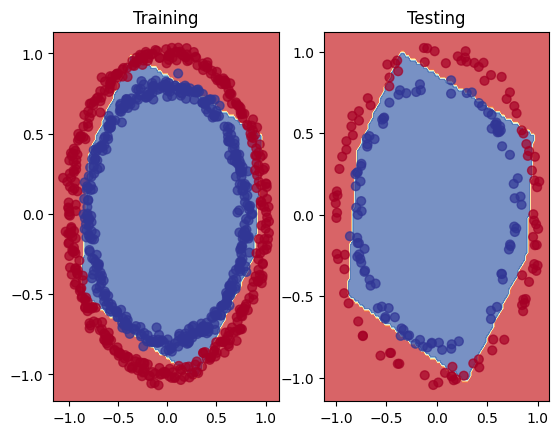

In [52]:
plt.Figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Training')
plot_deci_boundary(model=model4,features=x_train,Labels=y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_deci_boundary(model=model4,features=x_test,Labels=y_test)
plt.show()

**Evaluation models**
* ***accuracy***
* ***precision***
* ***recall***
* ***F1 score***
* ***confusion matrix***
* ***classification report***

In [59]:
# Working with confusion matrix
from sklearn.metrics import confusion_matrix

In [61]:
y_pred = model4.predict(x_test)
y_pred[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.8762894 ],
       [0.97991025],
       [0.5594743 ],
       [0.9980864 ],
       [0.09549802],
       [0.00128406],
       [0.6887737 ],
       [0.47711012],
       [0.94456124],
       [0.7592207 ]], dtype=float32)

In [63]:
y_pred = tf.round(y_pred)

In [64]:
cm =confusion_matrix(y_test, y_pred=y_pred)
cm

array([[90, 11],
       [ 6, 93]], dtype=int64)

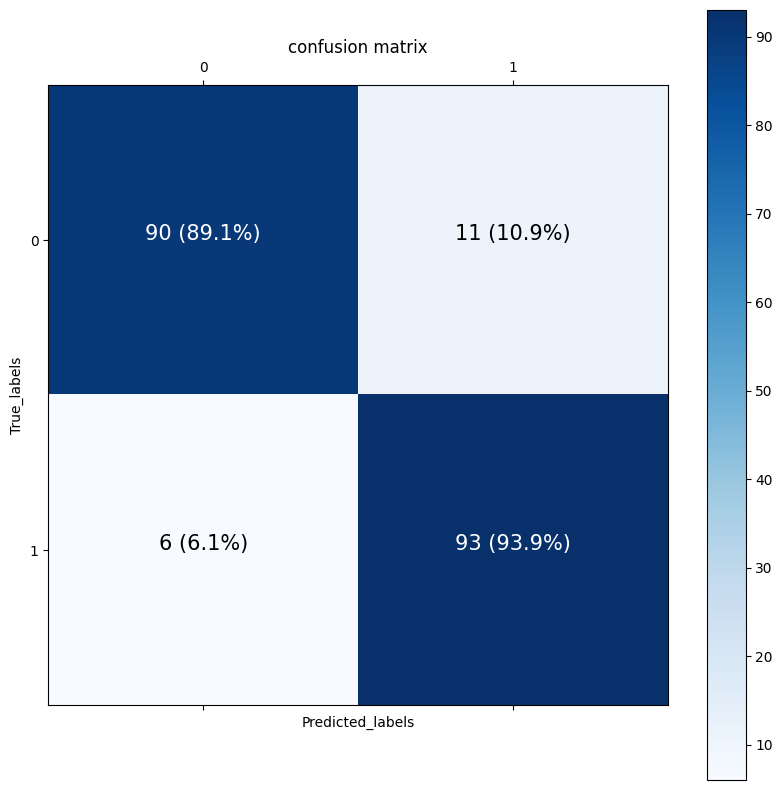

In [80]:
import itertools

figsizes = (10,10)

# defining the matrix
cm_norn = cm.astype('float32')/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=(figsizes))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
    label = classes
else:
    label = np.arange(cm.shape[0])

ax.set(title='confusion matrix',
       xlabel = 'Predicted_labels',
       ylabel = 'True_labels',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = label,
       yticklabels = label,
)

threshold  = (cm.max()+cm.min())/2.

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norn[i,j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i,j]> threshold else 'black',
             size=15)